In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
df1=pd.read_csv('Amazon - Movies and TV Ratings.csv')

In [85]:
df1.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
idx=['user_id']
multi_indexed_df = df1.set_index(idx)
stacked_df = multi_indexed_df.stack(dropna=False)
long_df = stacked_df.reset_index()

In [87]:
long_df

,user_id,level_1,0
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
2,A3R5OBKS7OM2IR,Movie3,NaN
3,A3R5OBKS7OM2IR,Movie4,NaN
4,A3R5OBKS7OM2IR,Movie5,NaN
...,...,...,...
998683,AI4J762YI6S06,Movie202,NaN
998684,AI4J762YI6S06,Movie203,NaN
998685,AI4J762YI6S06,Movie204,NaN
998686,AI4J762YI6S06,Movie205,NaN


In [88]:
df3=long_df.rename(columns={'user_id':'UserID','level_1':'Movie',0:'Rating'})

In [89]:
df4=df3[df3.Rating.notnull()]

In [90]:
df4.head()

,UserID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
208,AH3QC2PC1VTGP,Movie3,2.0
415,A3LKP6WPMP9UKX,Movie4,5.0
621,AVIY68KEPQ5ZD,Movie4,5.0


In [91]:
 df4.to_excel("AmazonMovie.xlsx")  

In [92]:
df4.shape

(5000, 3)

In [97]:
df_top10=df4.drop('UserID', axis=1).drop_duplicates('Movie').nlargest(10, ['Rating'])

In [ ]:
df_top10=df4.drop('UserID', axis=1).drop_duplicates('Movie')..nlargest(10, ['Rating'])

In [98]:
df_top10

,Movie,Rating
0,Movie1,5.0
1,Movie2,5.0
415,Movie4,5.0
828,Movie5,5.0
7010,Movie7,5.0
7217,Movie8,5.0
7424,Movie9,5.0
7631,Movie10,5.0
7838,Movie11,5.0
8251,Movie12,5.0


In [20]:
df4.describe()['Rating']

count    5000.000000
mean        4.385600
std         1.199667
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

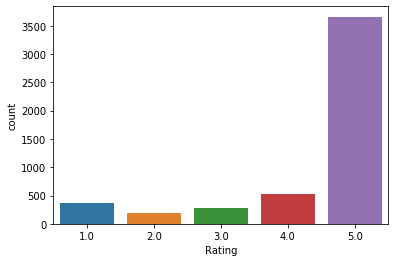

In [24]:
g=sns.countplot(x='Rating',data=df4)
#g.set_ylabels('Total no of Ratings')

In [26]:
print('no of users :',len(np.unique(df4.UserID)))
print('no of Movies :',len(np.unique(df4.Movie)))

no of users : 4848
no of Movies : 206


In [31]:
NumofRatedMovies=df4.groupby(by='UserID')['Rating'].count().sort_values(ascending=False)

In [32]:
NumofRatedMovies

UserID
A2AKR3QR28W09U           6
A1ISBRQ8WUFE41           5
A137SY2CCOWTP6           5
A6GMEO3VRY51S            5
A3H82LUT1EC655           4
                        ..
A3HYO67Q48EOR4           1
A3HZ47QXB63B26           1
A3I2GBE2KGQV1U           1
A3I37BOCIZSMMK           1
A0047322388NOTO4N8SKD    1
Name: Rating, Length: 4848, dtype: int64

In [33]:
NumMovies=df4.groupby(by='Movie')['Rating'].count().sort_values(ascending=False)
#df4['Movie'].value_counts()

In [36]:
NumMovies.head()

Movie
Movie127    2313
Movie140     578
Movie16      320
Movie103     272
Movie29      243
Name: Rating, dtype: int64

In [82]:
NumMovies.tail()

Movie
Movie45    1
Movie42    1
Movie41    1
Movie38    1
Movie1     1
Name: Rating, dtype: int64

In [37]:
df4.head()

,UserID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
208,AH3QC2PC1VTGP,Movie3,2.0
415,A3LKP6WPMP9UKX,Movie4,5.0
621,AVIY68KEPQ5ZD,Movie4,5.0


In [44]:
g=df4.groupby('UserID')['Rating']

In [42]:
g.apply(lambda x:x.value_counts())

Rating          
1.0     Movie127    277
        Movie103     17
        Movie90      13
        Movie140      7
        Movie107      5
                   ... 
5.0     Movie72       1
        Movie61       1
        Movie175      1
        Movie176      1
        Movie63       1
Name: Movie, Length: 351, dtype: int64

In [60]:
ms=df4.groupby('Movie').agg({'Rating':[np.size,np.mean]})
#,np.max,np.mean,np.min

In [61]:
ms.head()

Rating     
           size mean
Movie               
Movie1      1.0  5.0
Movie10     1.0  5.0
Movie100    1.0  4.0
Movie101    5.0  5.0
Movie102    2.0  4.0

In [65]:
#ms.sort_values(['size','mean'],ascending=False).head()

In [66]:
df4['Movie'].max()

'Movie99'

In [67]:
df4['Movie'].min()

'Movie1'

In [70]:
df4['Rating'].max()

5.0

In [80]:
df4['Count_Rating']=df4.groupby(['Movie']).transform(max)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
df4['Rating'].mean()

4.3856

In [100]:
df3=df4.drop('UserID',axis=1).groupby('Movie')['Rating'].agg(['count','mean']).reset_index()

In [123]:
df3.tail()

,Movie,count,mean
201,Movie95,6,3.333333
202,Movie96,3,5.000000
203,Movie97,5,4.800000
204,Movie98,1,5.000000
205,Movie99,2,4.000000


In [104]:
df3['mean'].max()

5.0

In [111]:
a=df3[df3['mean']==df3['mean'].max()]
a.sort_values('count',ascending=False)

,Movie,count,mean
96,Movie186,9,5.0
102,Movie191,6,5.0
98,Movie188,6,5.0
99,Movie189,5,5.0
21,Movie118,5,5.0
...,...,...,...
93,Movie183,1,5.0
90,Movie180,1,5.0
89,Movie18,1,5.0
87,Movie178,1,5.0


In [112]:
b=df3[df3['mean']==df3['mean'].min()]
b.sort_values('count',ascending=False)

,Movie,count,mean
50,Movie144,1,1.0
61,Movie154,1,1.0
146,Movie45,1,1.0
160,Movie58,1,1.0
163,Movie60,1,1.0
170,Movie67,1,1.0
172,Movie69,1,1.0


In [115]:
df4

,UserID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
208,AH3QC2PC1VTGP,Movie3,2.0
415,A3LKP6WPMP9UKX,Movie4,5.0
621,AVIY68KEPQ5ZD,Movie4,5.0
...,...,...,...
997863,A1IMQ9WMFYKWH5,Movie206,5.0
998069,A1KLIKPUF5E88I,Movie206,5.0
998275,A5HG6WFZLO10D,Movie206,5.0
998481,A3UU690TWXCG1X,Movie206,5.0


In [165]:
X=df4.iloc[:,:2]
Y=df4.iloc[:,2:]

In [166]:
X = X.astype(str)

In [167]:
X

,UserID,Movie
0,A3R5OBKS7OM2IR,Movie1
1,A3R5OBKS7OM2IR,Movie2
208,AH3QC2PC1VTGP,Movie3
415,A3LKP6WPMP9UKX,Movie4
621,AVIY68KEPQ5ZD,Movie4
...,...,...
997863,A1IMQ9WMFYKWH5,Movie206
998069,A1KLIKPUF5E88I,Movie206
998275,A5HG6WFZLO10D,Movie206
998481,A3UU690TWXCG1X,Movie206


In [168]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

ValueError: could not convert string to float: 'A3G9F5EGOJFWPB'

In [155]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [162]:
#accuracy_score(Y_train,predicted)
#regr.score(X_train,y_train)
a=round(regr.score(X_train,y_train)*100,2)
a

-97.84

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [143]:
#from sklearn import linear_model
#model= linear_model.LinearRegression()

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [144]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Movie127'

## New Model

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [191]:
df4.head()

,UserID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
208,AH3QC2PC1VTGP,Movie3,2.0
415,A3LKP6WPMP9UKX,Movie4,5.0
621,AVIY68KEPQ5ZD,Movie4,5.0


In [195]:
X=pd.get_dummies(df4[['UserID','Movie']])
X.head()

,UserID_A0047322388NOTO4N8SKD,UserID_A00473363TJ8YSZ3YAGG9,UserID_A1004AX2J2HXGL,UserID_A100CQXJ6D44T9,UserID_A100Z2S0880G9A,UserID_A1027BL79BSP5P,UserID_A102Z4PIK7CYD8,UserID_A10367AR7BPFG2,UserID_A103HNKB9YAN6P,UserID_A103KNDW8GN92L,...,Movie_Movie90,Movie_Movie91,Movie_Movie92,Movie_Movie93,Movie_Movie94,Movie_Movie95,Movie_Movie96,Movie_Movie97,Movie_Movie98,Movie_Movie99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
X.describe()

,UserID_A0047322388NOTO4N8SKD,UserID_A00473363TJ8YSZ3YAGG9,UserID_A1004AX2J2HXGL,UserID_A100CQXJ6D44T9,UserID_A100Z2S0880G9A,UserID_A1027BL79BSP5P,UserID_A102Z4PIK7CYD8,UserID_A10367AR7BPFG2,UserID_A103HNKB9YAN6P,UserID_A103KNDW8GN92L,...,Movie_Movie90,Movie_Movie91,Movie_Movie92,Movie_Movie93,Movie_Movie94,Movie_Movie95,Movie_Movie96,Movie_Movie97,Movie_Movie98,Movie_Movie99
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.003600,0.025600,0.020200,0.000400,0.00060,0.001200,0.00060,0.00100,0.000200,0.000400
std,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,...,0.059898,0.157955,0.140698,0.019998,0.02449,0.034624,0.02449,0.03161,0.014142,0.019998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000


In [194]:
y.head()

,Rating
0,5.0
1,5.0
208,2.0
415,5.0
621,5.0
...,...
997863,5.0
998069,5.0
998275,5.0
998481,5.0


In [201]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)

In [202]:
a=round(regr.score(X_train,Y_train)*100,2)
a

98.26

## New Approach

In [126]:
df4.head()

,UserID,Movie,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,A3R5OBKS7OM2IR,Movie2,5.0
208,AH3QC2PC1VTGP,Movie3,2.0
415,A3LKP6WPMP9UKX,Movie4,5.0
621,AVIY68KEPQ5ZD,Movie4,5.0


In [127]:
df4.groupby('Movie')['Rating'].mean().sort_values(ascending=False).head()

Movie
Movie191    5.0
Movie189    5.0
Movie167    5.0
Movie168    5.0
Movie169    5.0
Name: Rating, dtype: float64

In [128]:
df4.groupby('Movie')['Rating'].count().sort_values(ascending=False).head()

Movie
Movie127    2313
Movie140     578
Movie16      320
Movie103     272
Movie29      243
Name: Rating, dtype: int64

In [130]:
ratings = pd.DataFrame(df4.groupby('Movie')['Rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(df4.groupby('Movie')['Rating'].count()) 
  
ratings.head()

,Rating,num of ratings
Movie,,
Movie1,5.0,1
Movie10,5.0,1
Movie100,4.0,1
Movie101,5.0,5
Movie102,4.0,2


In [135]:
ratings.sort_values('num of ratings', ascending = False)

,Rating,num of ratings
Movie,,
Movie127,4.111976,2313
Movie140,4.833910,578
Movie16,4.518750,320
Movie103,4.562500,272
Movie29,4.806584,243
...,...,...
Movie38,5.000000,1
Movie37,5.000000,1
Movie36,5.000000,1
